<img src="img/svds_logo.png" alt="SVDS" width="500" align="left">

# PyData San Francisco 2016
## Applied Time Series Econometrics in Python (and R) Tutorial
### Section 2: Exploratory Time Series Data Analysis and the class of ARIMA Models

### Topics in this section include 

- 2.1 The notion of stochastic processes, time series, and stationarity
- 2.2 Exploratory Time Series Data Analysis
- 2.3 Mathematical formulation of ARIMA models
- 2.4 An Introduction to the *Box-Jenkins Approach* to ARIMA Modeling

### 2.1 The notion of Stochastic Processes, Time Series, Stationarity, Autocorrelation
<div class="alert alert-danger"> Warning: This is a relatively dense section. However, it sets up the necessary framework for us to study the class of *Autoregressive Integrated Moving Average* model. </div>

#### Key Takeaway from this section:
1. An observed time series is treated as a realization of an underlying probability model.
2. We will study a certain class of probability model that comes with a very appealing (and simple) probability structure.
3. The concept of (weak) stationarity is a key requirement of the class of time series models that we will study.
4. The concept of autocorrelation function and (partial) autocorrelation function are a main tool for us to analyze a time series.


* The $\textbf{autocovariance function}$ is defined as

$$\gamma_{x}(s,t) = cov(x_s,x_t) = E[(x_s-\mu_s)(x_t-\mu_t)] \forall s,t$$

* Two natural implications are $(1) \gamma_{x}(s,t) = \gamma_{x}(t,s)$ and $(2)$ $\gamma_{x}(s,s) = cov(x_s,x_s) = E[(x_s-\mu_s)^2]$

* A correlation of a variable with itself at different times is known as $\textit{autocorrelation}$. If a time series model is second-order stationary (i.e. stationary in both mean and variance: $\mu_t = \mu$ and $\sigma_t^2 = \sigma^2$ for all $t$), then an $\textit{autocovariance function}$ can be expressed as a function only of the time lag $k$:

$$ \gamma_k = E[(x_t-\mu)(x_{t+k} - \mu)] $$
  
* Likewise, the autocorrelation function \emph{acf} is defined as

$$ \rho_k = \frac{\gamma_k}{\sigma^2} $$
  
* When $k=0$, $\rho_0 = 1$

#### Estimation of ($\mathbf{1^{st}}$ order) Dependency:

* Using the $\textit{moment principles}$, the $\textit{acvf}$ and $\textit{acf}$ can be estimated from a time series by their sample equivalents. The sample \emph{acvf} can be estimated using the following formula:

$$ \hat{\gamma}_k = \frac{1}{T} \sum_{t=1}^{T-k} \left( x_t - \bar{x} \right) \left( x_{t+k} - \bar{x} \right) $$

* Note that the sum is divided by $T$ and and not $T-k$.

* The sample $\textit{ACF}$ is defined by

$$ \frac{\hat{\gamma}_k}{\hat{\gamma}_0} = \frac{\frac{1}{T} \sum_{t=1}^{T-k} \left( x_t - \bar{x} \right) \left( x_{t+k} - \bar{x} \right)}{ \frac{1}{T} \sum_{t=1}^{T} \left( x_t - \bar{x} \right)^2} $$


#### Notion of Stationarity:


* A time series ${x_t}$ is said to be $\textit{strictly stationary}$ if the joint distributions $F(x_{t_1}, \dots, x_{t_n})$ and $F( x_{t_1+m}, \dots, x_{t_n +m})$ are the same, $\forall$ $t_1, ... t_n$ and $m$. This is a very strong condition, too strong to be applied in practice; it implies that the distribution is unchanged for any time shift!

* A weaker and more practical stationarity condition is that of $\textit{weakly stationary}$ (or $\textit{second order stationarity}$). A time series $x_t$ is said to be $\textit{weakly stationary}$ if it is mean and variance stationary and its autocovariance $Cov(x_t,x_{t+k})$ depends only the time displacement $k$ and can be written as $\gamma(k)$. 

* Second order stationarity plays an important role in many of the time series models we will discuss in this tutorial; if a time series is second order stationary, then once a distribution assumption, such as normality, is imposed, the series can be completely characterized by its mean and covariance structure.

### 2.2 Exploratory Time Series Data Analysis

* Now that we introduce the essential concepts for characterizing the probability structure of a time series, we will proceed to "$\textit{explore}$" these characteristics empirically.

* Specifically, we will use *time series plot, histogram (and its variants), plot of sample autocorrelation, and plot of sample partial autocorrelation}* to examine a given time series. 

* These visuals play a very crucial role in the $\textit{Box-Jenkins approach}$ to ARIMA modeling.

In [1]:
# Set up

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
import os

import pandas as pd
import numpy as np

# Remote Data Access
import pandas_datareader.data as web
import datetime
# reference: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from statsmodels.graphics.api import qqplot

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
# sns.set_style("darkgrid")
# sns.set_style("whitegrid")
sns.set(style='ticks', context='talk')

# set up some plotting defaults
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 3

In [2]:
# Load data from the internet using the Remote Data Reader
# This is a very useful function, as it allows one to access a lot of time series and (non-time series) data publicly
# available on the internet

# start = datetime.datetime(2000, 1, 1)
# end = datetime.datetime(2016, 7, 31)

start = pd.Timestamp('2000-01-01')
end = pd.Timestamp('2016-07-31')

C = web.DataReader("C", 'yahoo', start, end)
Sentiment= web.DataReader("UMCSENT", 'fred', start, end)
T10yr = web.DataReader("^TNX", 'yahoo', start, end)

# Save the DataFrame to a csv file
Sentiment.to_csv('data/sentiment.csv')
C.to_csv('data/citi.csv')
T10yr.to_csv('data/T10yr.csv')

In [ ]:
#Read the data

Sentiment = 'data/sentiment.csv'
Sentiment = pd.read_csv(Sentiment, index_col=0, parse_dates=[0])

C = 'data/citi.csv'
C = pd.read_csv(C, index_col=0, parse_dates=[0])

T10yr = 'data/T01yr.csv'
T10yr = pd.read_csv(T10yr, index_col=0, parse_dates=[0])

In [4]:
print("Citigroup's stock price:", "\n", C.dtypes, "\n")
print("10 Year Treasury Bond Rate:", "\n", T10yr.dtypes, "\n")
print("University of Michigan: Consumer Sentiment:", "\n", Sentiment.dtypes)

Citigroup's stock price: 
 Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object 

10 Year Treasury Bond Rate: 
 Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object 

University of Michigan: Consumer Sentiment: 
 UMCSENT    float64
dtype: object


In [5]:
T10yr.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.49800,6.60300,6.49800,6.54800,0,6.54800
2000-01-04,6.53000,6.54800,6.48500,6.48500,0,6.48500
2000-01-05,6.52100,6.59900,6.50800,6.59900,0,6.59900
2000-01-06,6.55800,6.58500,6.54000,6.54900,0,6.54900
2000-01-07,6.54500,6.59500,6.50400,6.50400,0,6.50400


In [6]:
C['Close'].head(10)

Date
2000-01-03   52.99868
2000-01-04   49.74876
2000-01-05   51.74871
2000-01-06   54.24864
2000-01-07   53.99865
2000-01-10   53.81116
2000-01-11   53.12367
2000-01-12   54.99863
2000-01-13   55.62361
2000-01-14   57.99855
Name: Close, dtype: float64

In [7]:
Sentiment.head()

,UMCSENT
DATE,
2000-01-01,112.00000
2000-02-01,111.30000
2000-03-01,107.10000
2000-04-01,109.20000
2000-05-01,110.70000


In [8]:
C.close = C['Close']
T10yr.close = T10yr['Close']

### Plots to used in Exploratory  Time Series Analysis

* Time series plot: to visualize the dynamic and evolution of the series
* Histogram or NP Density: to visualize the distribution 
* Sample ACF and PACF graphs: to examine autocorrelation and partial autocorrelation
* Scatterplot matrix on lags: An alternative way to visualize autocorrelation of the series

In [21]:
Sentiment.head()

,UMCSENT
DATE,
2000-01-01,112.00000
2000-02-01,111.30000
2000-03-01,107.10000
2000-04-01,109.20000
2000-05-01,110.70000


In [10]:
# Select the series from 2005 - 2016
sentiment_short = Sentiment.ix['2005':'2016']

In [11]:
sentiment_short.index[:5]

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [12]:
print(sentiment_short.dtypes)

UMCSENT    float64
dtype: object


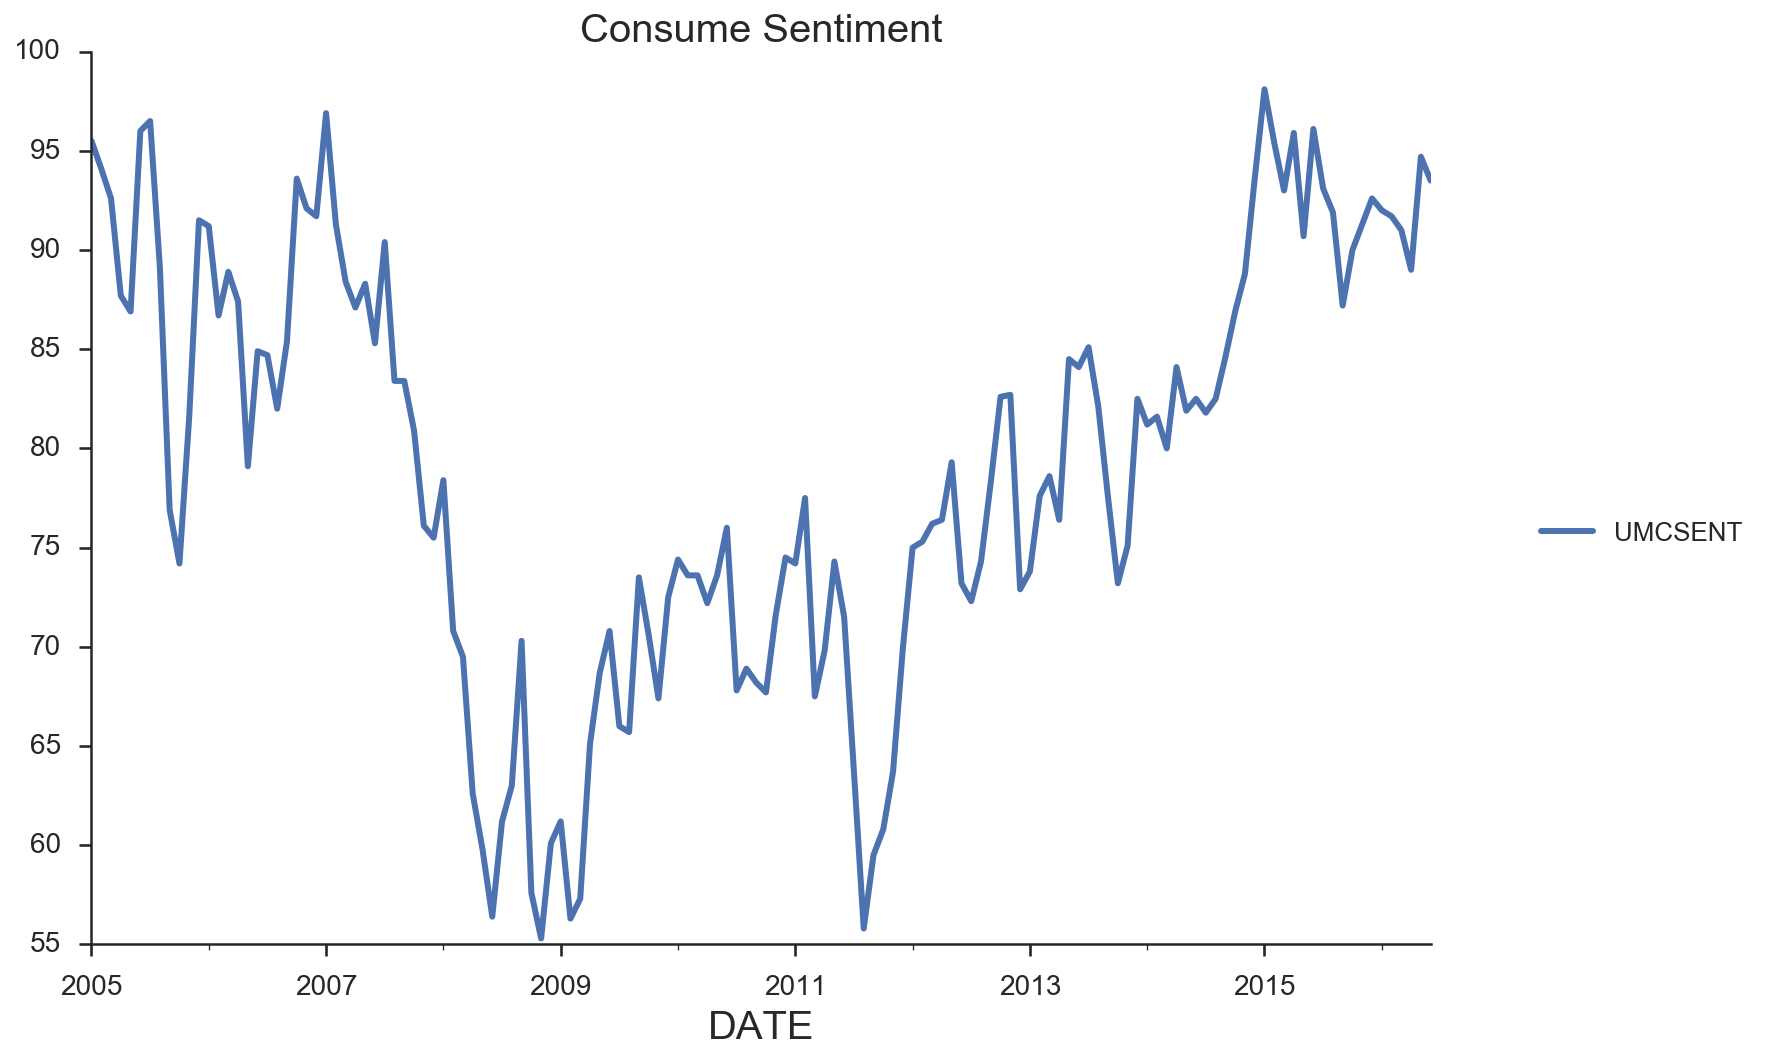

In [13]:
sentiment_short.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Consumer Sentiment")
sns.despine()

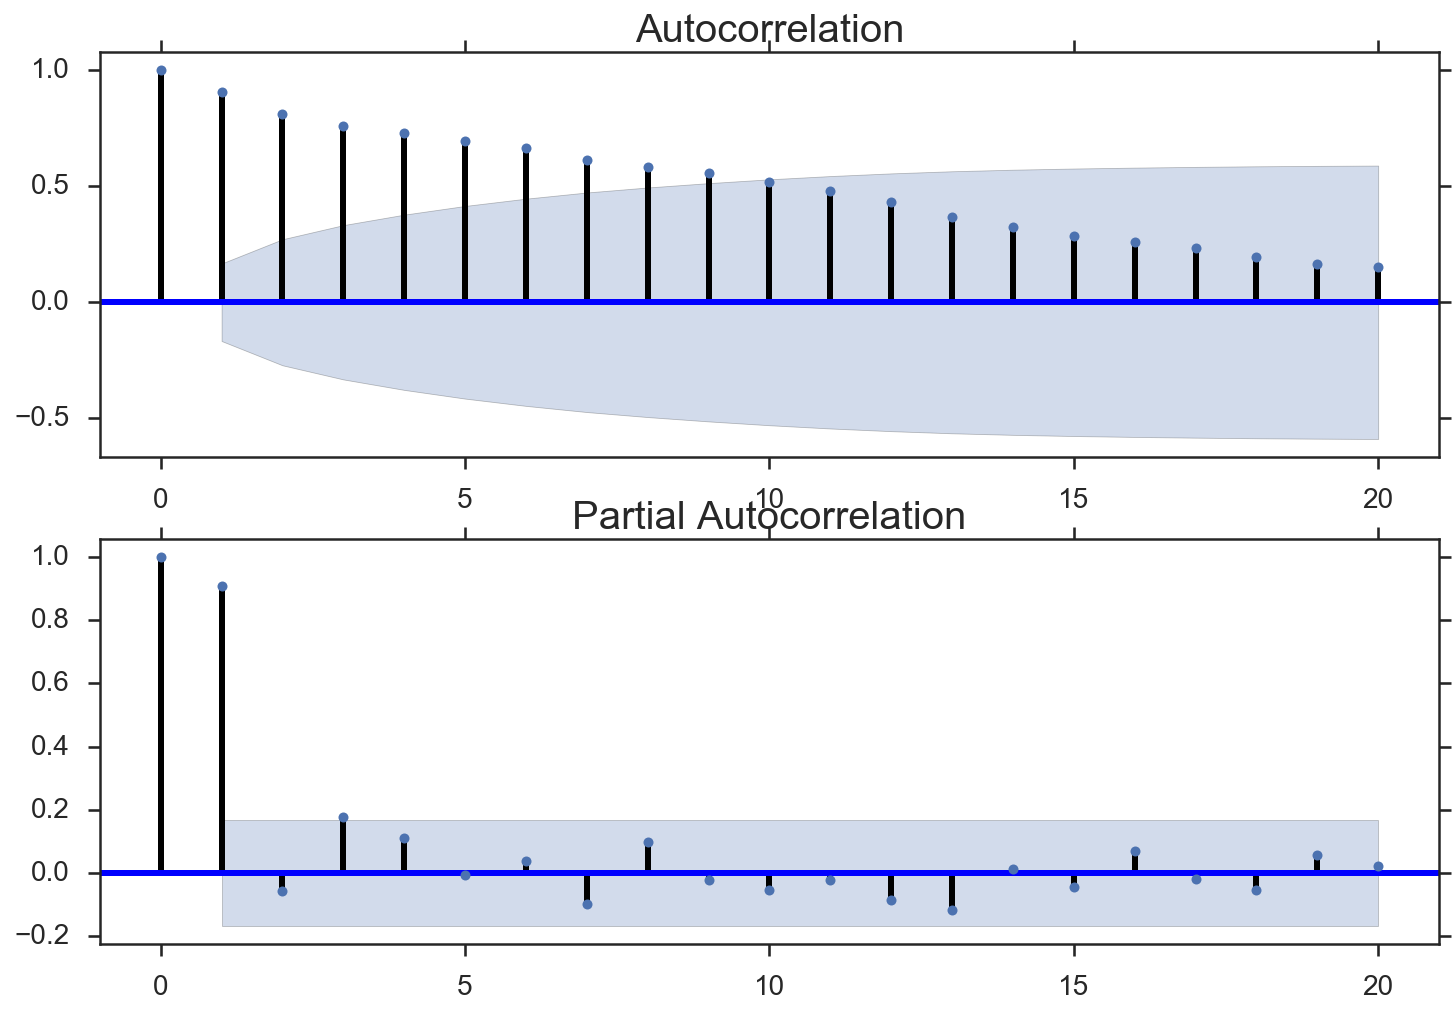

In [14]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sentiment_short, lags=20, ax=ax3)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sentiment_short, lags=20, ax=ax4)

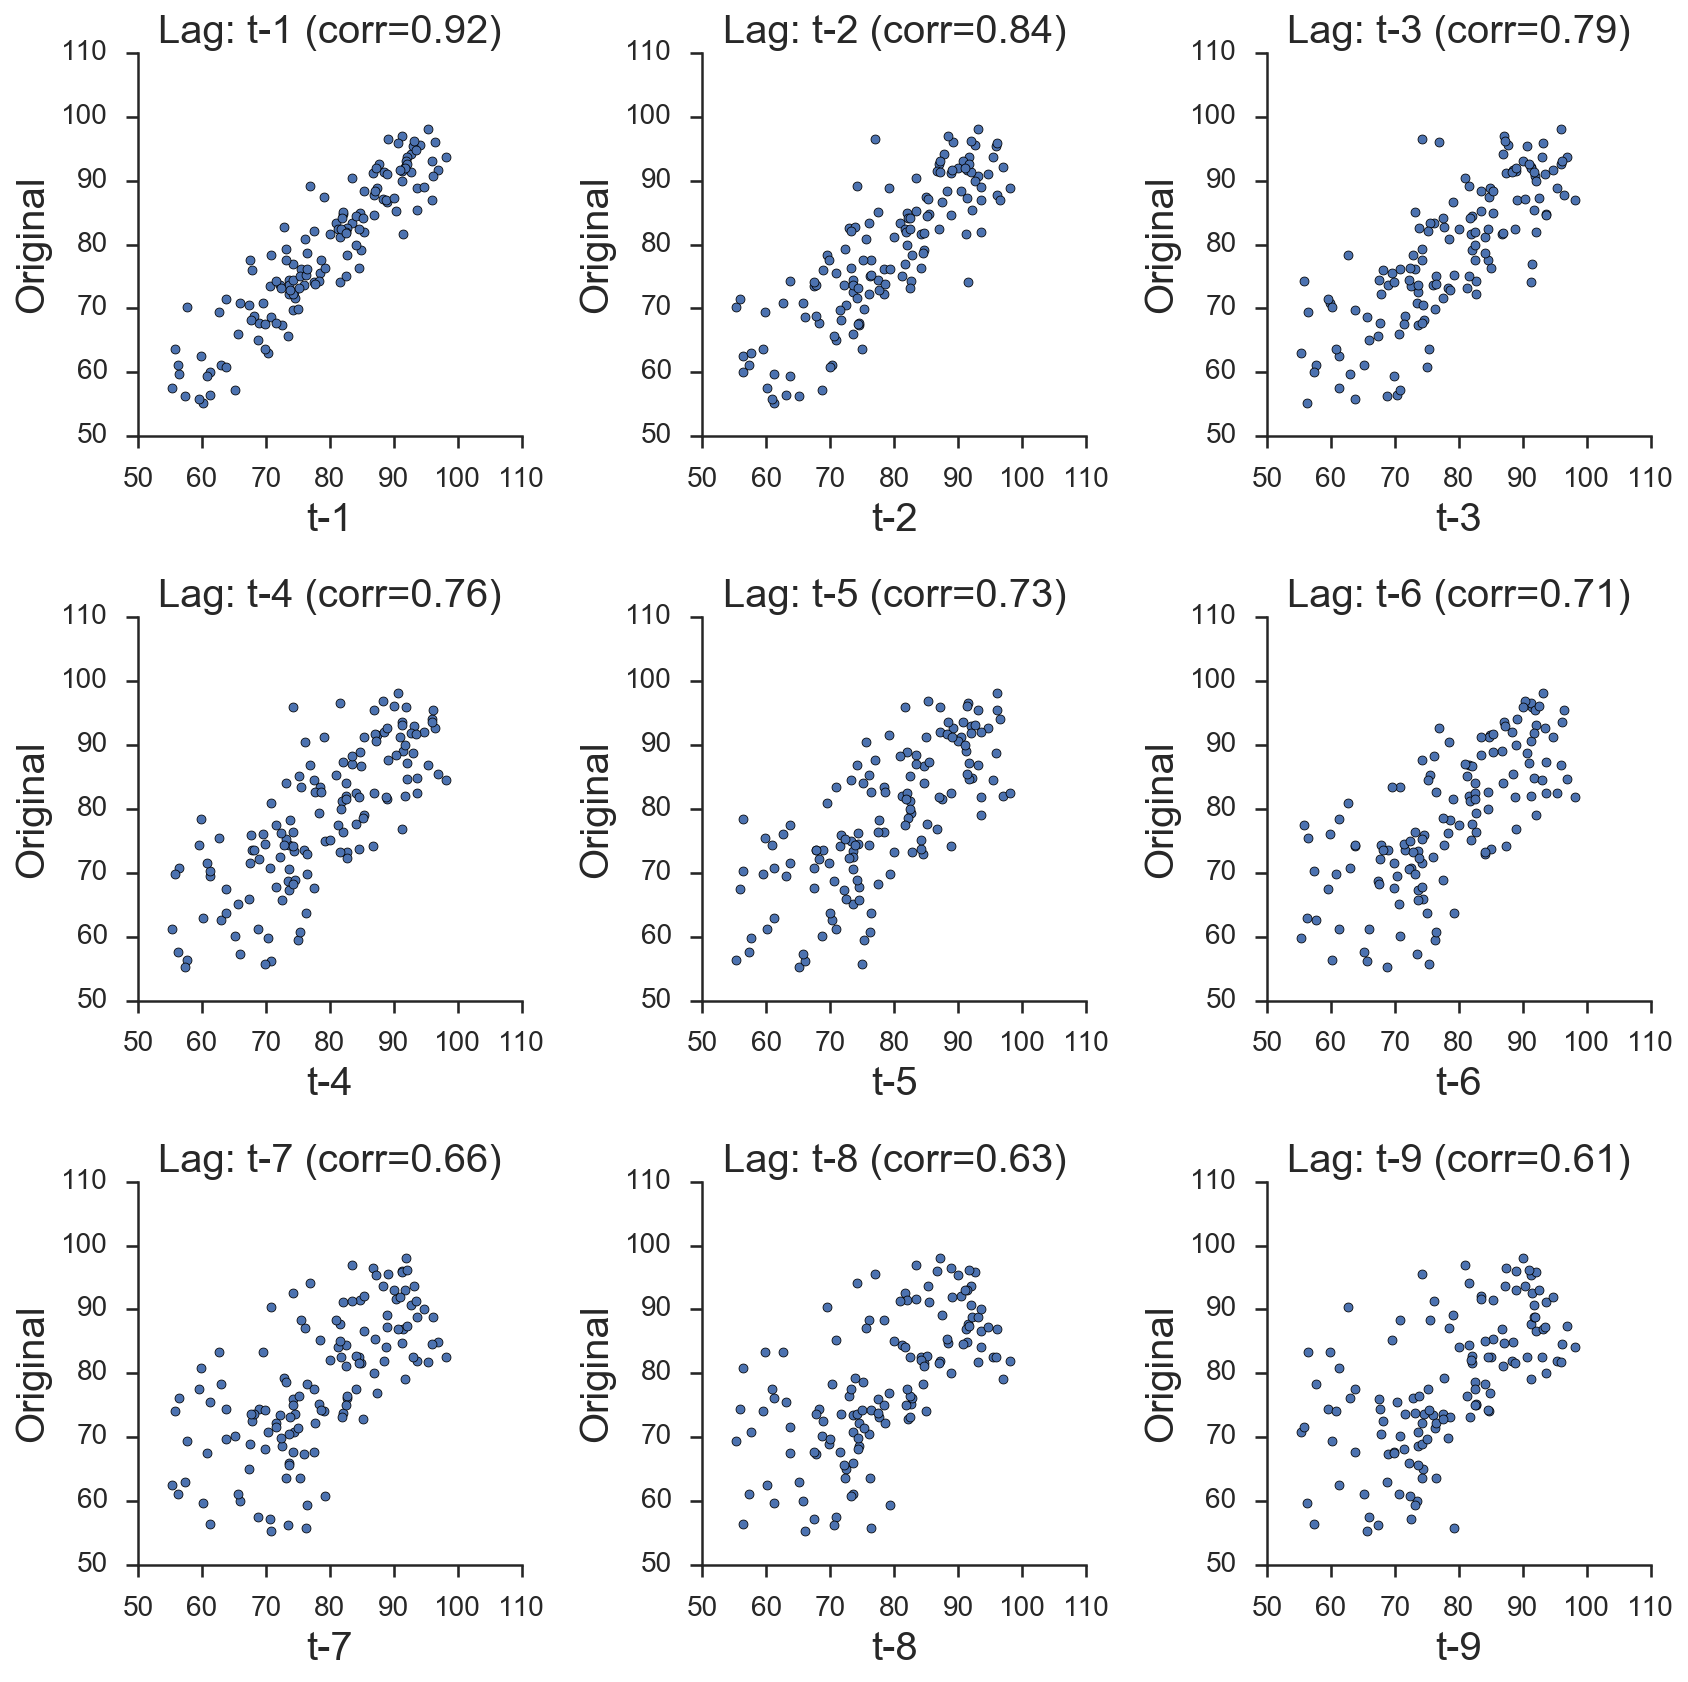

In [17]:
# Scatterplot matrix is another way to visualize the autocorrelation
# Its advantage is that it is very intuitive, as scatterplot (i.e. one of the plots in a scatterplot matrix) 
# is used often in practice

lags=9

ncols=3
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([sentiment_short, sentiment_short.shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

plt.tight_layout();

In [12]:
# Or, we can plot the four essential plots all at once:

def tsplot(y, lags=None, title='', figsize=(14, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    #ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    

    y.plot(ax=ts_ax)
    plt.title(title)
    y.hist(ax=hist_ax, bins=25)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x111292320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114bac630>)

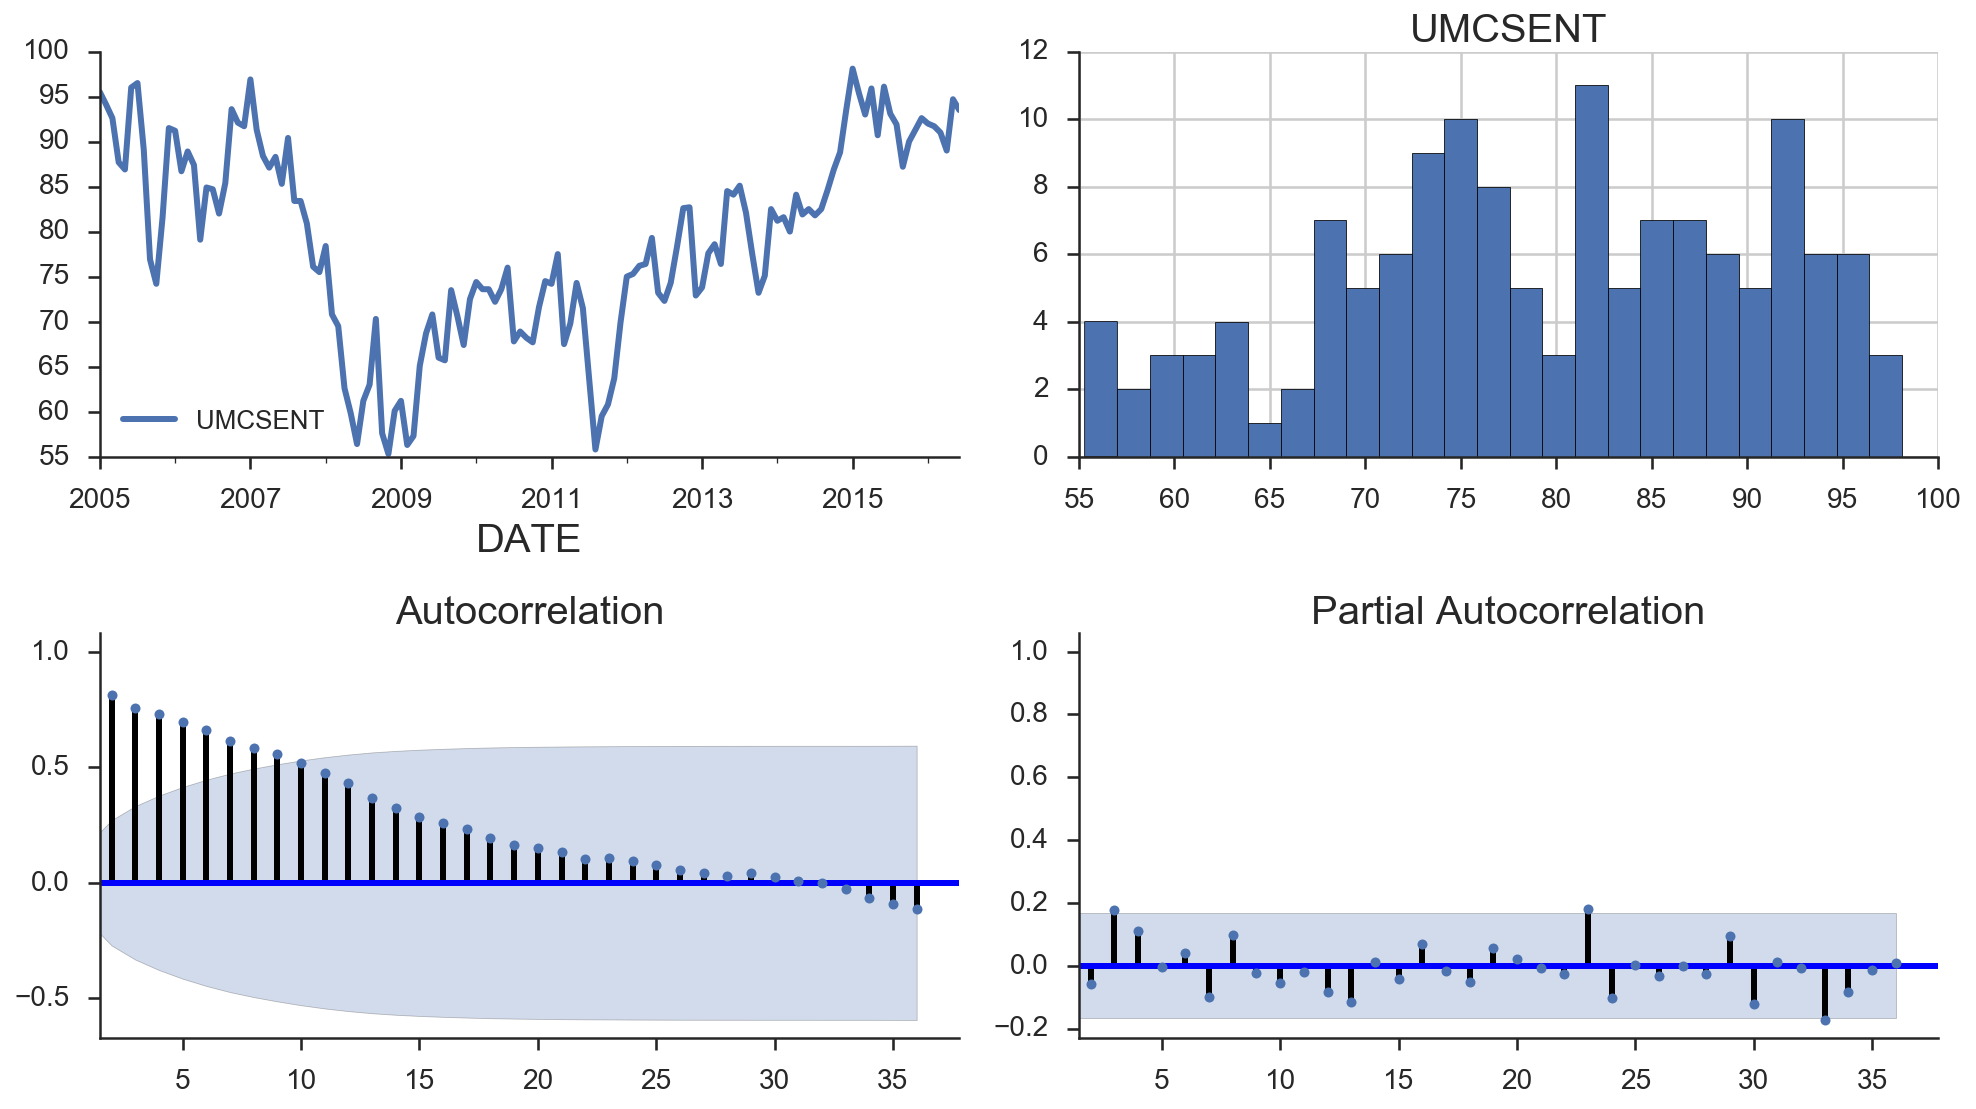

In [16]:
tsplot(sentiment_short, title='Consumer Sentiment', lags=36)

### 2.3 Mathematical formulation of ARIMA models

* A time series ${z_t}$ follows an ARIMA$(p,d,q)$ process if the $d^{th}$ differences of the ${z_t}$ series is an ARMA($p,q$) process. Using lag operator, it can expressed as 

$$\begin{equation}
  \phi_p(B)(1-B)^d z_t = \theta_q(B) \omega_t
\end{equation}$$

where $\phi_p$ and $\theta_q$ are polynomials of orders $p$ and $q$.

* Writing an ARIMA$(p,d,q)$ may seem too abstract, and whenever a model is presented this way, you may get a feel of the model by making simple cases, such as a low order ARIMA$(p,d,q)$ model. 



* Below show two such examples to unpack some of these notations:

$\textbf{Example 1:}$
Consider the model $ z_t = z_{t-1} + \omega_t + \theta \omega_{t-1}$.  Re-write this model using lag (or backward shift) operator. By now, we should be familiar with this kind of manipulation:

$$\begin{align}
   z_t &= z_{t-1} + \omega_t + \theta \omega_{t-1} \\
   z_t - z_{t-1} &= \omega_t + \theta \omega_{t-1} \\
  (1-B)z_t &= (1+\theta B)\omega_t
\end{align}$$

where $B$ is a lag operator that when applying to $z_t$, gives $z_{t-1}$. That is, $Bz_t = z_{t-1}$.

* This becomes an ARIMA(0,1,1) model, or $\textit{integrated moving average}$ model (IMA(1,1)).

$\textbf{Example 2:}$
Consider a model of the form

$$\begin{equation}
     z_t = \phi z_{t-1} + z_{t-1} - \phi z_{t-2} + \omega_t
\end{equation}$$

* Rewrite the equation, re-arrange terms, and factorize them:

$$\begin{align}
   z_t - z_{t-1} &= \phi (z_{t-1} - z_{t-2}) + \omega_t \\
   (z_t - z_{t-1}) - \phi (z_{t-1} - z_{t-2}) &= \omega_t \\
   (1 - \phi B)(z_t - z_{t-1}) &=  \omega_t \\
   (1 - \phi B) \bigtriangledown z_t &=  \omega_t \\
   (1 - \phi B)(1 - B)z_t  &= \omega_t
\end{align}$$

The model can be re-written as $(1 - \phi B) \bigtriangledown y_t  = \omega_t$, which is an ARIMA(1,1,0) model.

**Sidenotes**

A series ${z_t}$ is $\textit{integrated}$ of order $d$, denoted as $I(d)$, if the $d^{th}$ differences of ${z_t}$ is a white noise: $\bigtriangledown^d y_t = \omega_t$, where $\bigtriangledown^d \equiv (1-B)^d$:

$$\begin{equation}
  (1-B)^d y_t = \omega_t
\end{equation}$$

As such, random walk is the special case I(1).

* In practice, I(0) and I(1) cases find themselves having the most applications.



### 2.4 An Overview of the Box-Jenkins Approach to Non-Seasonal ARIMA Modeling

1. Assess the stationarity of the process $z_t$
2. If the process is not stationary, difference it (i.e. create an integrated model) as many times as needed to produced a stationary process to be modeleled using the $\textit{mixed autoregressive-moving average process}$ described above.
3. Identify (i.e. determining the order of the process) the resulting the ARMA model.
  * The sample autocorrelation and sample partial autocorrelation functions are tools used in step $1$ and $2$.

In practice, other steps are necessary in order to produce a funcationable models. These steps include
- Model diagnostic checking
- Re-specification of the model if one or more of the underlying statistical assumptions is not satisfied
- Model selection
- Perform statistical inference and/or forecasting
- Forecast evaluation

<div class="alert alert-info">
**Exercise 2:**

Let use *series1.csv* and conduct the exploratory data analysis 
</div>

In [10]:
# Step 1: Import the csv file containing the series for the analysis
filename_ts = 'data/series1.csv'
ts_df = pd.read_csv(filename_ts, index_col=0, parse_dates=[0])

(<matplotlib.axes._subplots.AxesSubplot at 0x11362b128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11491c470>)

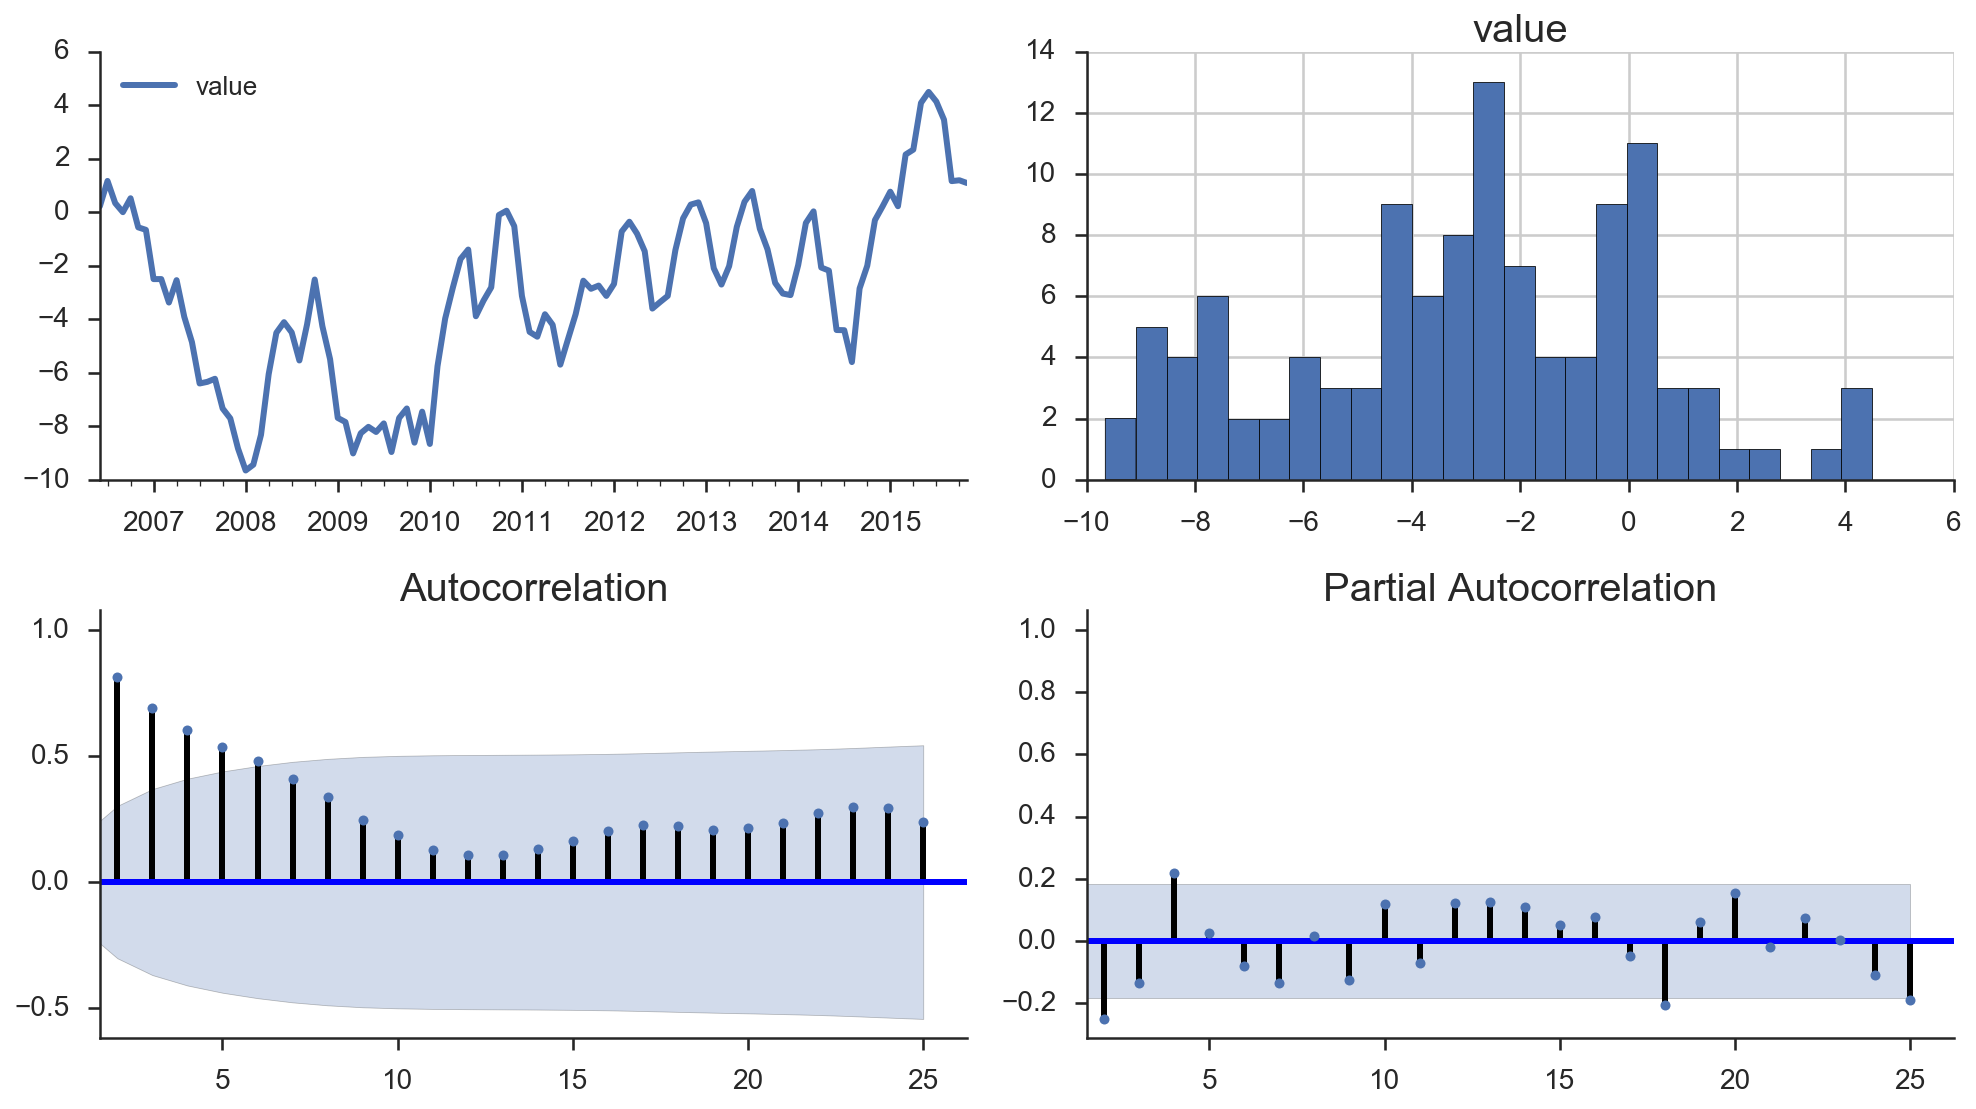

In [14]:
# Step 2: Explore the patterns of the time series and its autocorrelation and partial autocorrelction strucutre

# Choose the number of lags to display the sample ACF and PACF
n_lag=25
graph_title="Series 1"

# Make sure the tsplot() function is defined before running the following command
tsplot(ts_df, title=graph_title, lags=n_lag)

** Step 3**
Type your observations here and discuss with your neighbors.
* Are there any trend, seasonality, cycles?
* What are pattern of the ACF? Does it decline exponentially or dampen towards zero? Does it have a sharp cut-off?
* What about the PACF?